In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets

In [2]:
data = pd.read_excel("/content/Iris.xls")

In [ ]:
data

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
Y = data["iris"]
X = data.drop(["iris"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

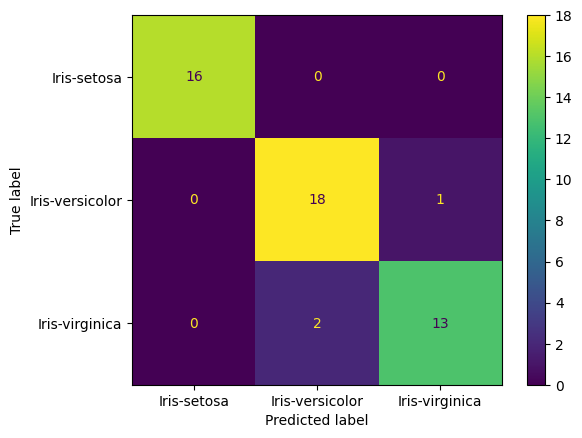

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_reg.classes_)

disp.plot()
plt.show()

In [ ]:
target_names = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.90      0.95      0.92        19
Iris-versicolor       0.93      0.87      0.90        15

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



ROC AUC ----> OVR

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9  1.   1.   0.95 0.95]
0.96 accuracy with a standard deviation of 0.04


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

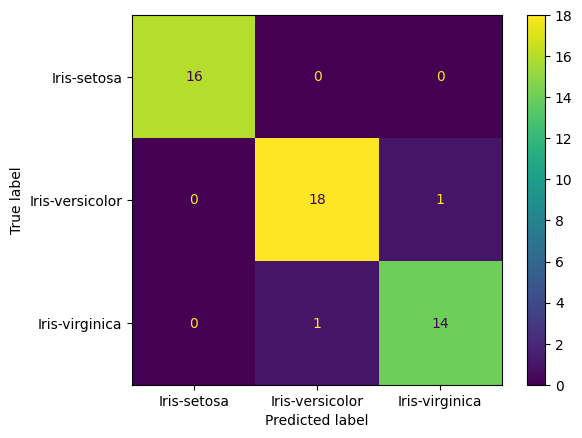

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.95      0.95      0.95        19
Iris-versicolor       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9  1.   1.   0.9  0.95]
0.95 accuracy with a standard deviation of 0.04


In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel= "rbf")
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

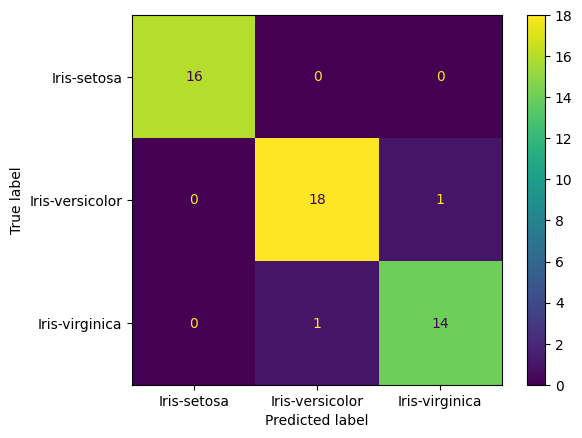

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.95      0.95      0.95        19
Iris-versicolor       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9  0.95 1.   0.95 0.95]
0.95 accuracy with a standard deviation of 0.03


In [ ]:
#4 metrics + AUC

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

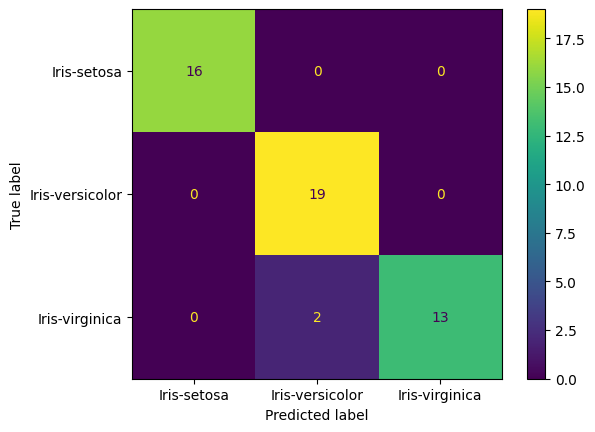

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.90      1.00      0.95        19
Iris-versicolor       1.00      0.87      0.93        15

       accuracy                           0.96        50
      macro avg       0.97      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9  1.   1.   0.95 0.95]
0.96 accuracy with a standard deviation of 0.04


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

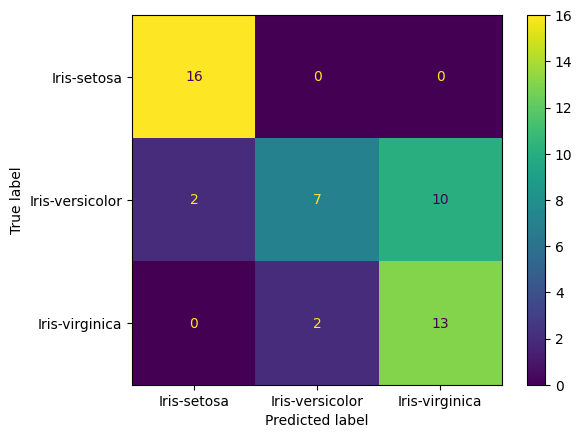

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bnb.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.89      1.00      0.94        16
 Iris-virginica       0.78      0.37      0.50        19
Iris-versicolor       0.57      0.87      0.68        15

       accuracy                           0.72        50
      macro avg       0.74      0.75      0.71        50
   weighted avg       0.75      0.72      0.70        50



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]
0.33 accuracy with a standard deviation of 0.00


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

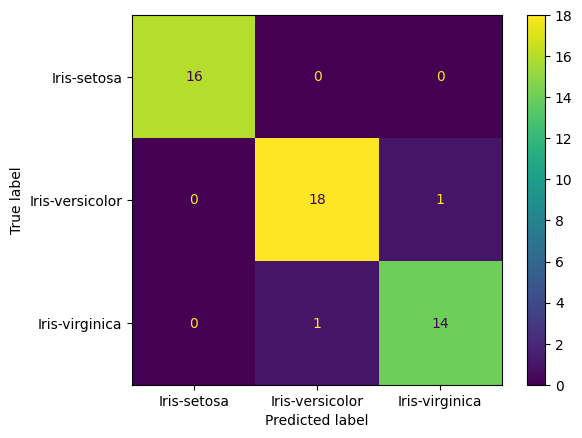

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.95      0.95      0.95        19
Iris-versicolor       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.95 1.   0.95 0.9  0.95]
0.95 accuracy with a standard deviation of 0.03


In [ ]:
#Random Tree
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

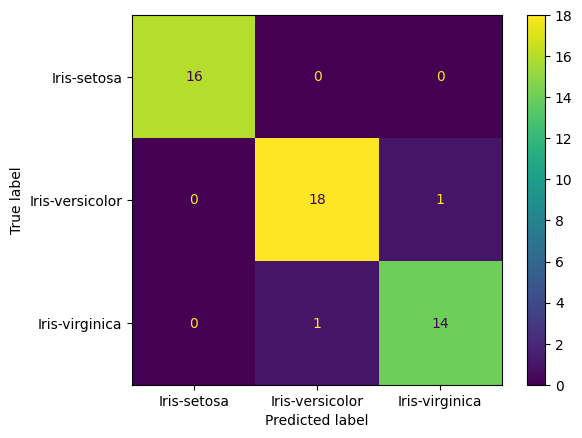

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       0.95      0.95      0.95        19
Iris-versicolor       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')

0.9975982968173122

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9  1.   1.   0.9  0.95]
0.95 accuracy with a standard deviation of 0.04


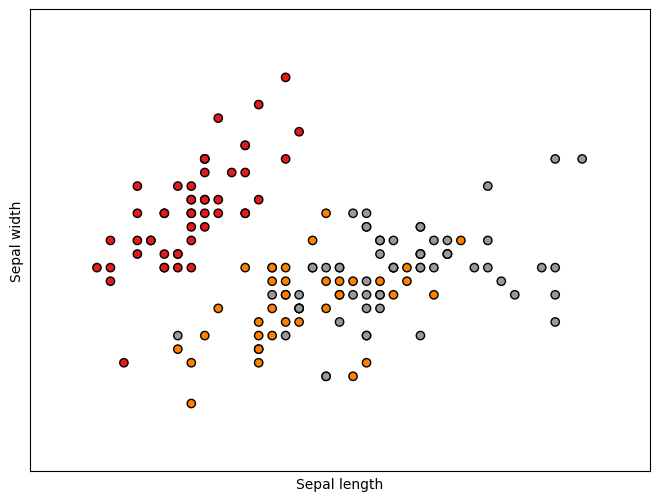

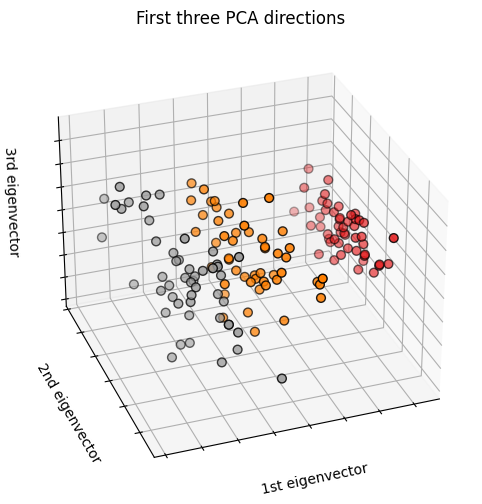

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
#lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

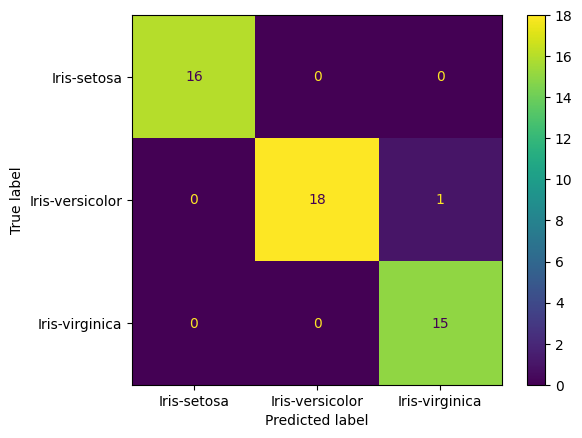

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       1.00      0.95      0.97        19
Iris-versicolor       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.         1.         1.         1.         0.93333333 1.
 0.86666667 1.         1.         1.        ]
0.98 accuracy with a standard deviation of 0.04


In [ ]:
#qda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

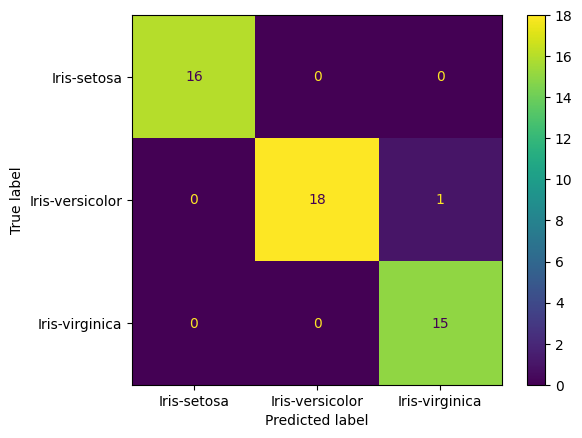

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
 Iris-virginica       1.00      0.95      0.97        19
Iris-versicolor       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lda, X, Y, cv=10)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[1.         1.         1.         1.         0.93333333 1.
 0.86666667 1.         1.         1.        ]
0.98 accuracy with a standard deviation of 0.04
